# CMS Exclusions Dataset Modeling

## DATA SOURCES
-------

I used data public US government data published by Center for Medicare and Medicaid Services (CMS) and Office of Inspector General (OIG) of Human and Health Services

* Data source 1:
  - publishing US agency - CMS
  - The Medicare Physician & Other Practitioners by Provider dataset provides information on use, payments, submitted charges and beneficiary demographic and health characteristics organized by National Provider Identifier (NPI).
  - URL: https://data.cms.gov/provider-summary-by-type-of-service/medicare-physician-other-practitioners/medicare-physician-other-practitioners-by-provider
* Data Source 2:
  - publishing US agency - OIG
  - OIG has the authority to exclude individuals and entities from Federally funded health care programs
  - URL: https://oig.hhs.gov/exclusions/exclusions_list.asp

In [258]:
import numpy as np
import pandas as pd
import os

In [259]:
#exclusions_file = 'data/exclusions_052020.csv'
exclusions_file = 'cms_data/leie.csv'
exclusions = pd.read_csv(exclusions_file)
exclusions = exclusions[exclusions.NPI > 0].set_index('NPI')

/tmp/ipykernel_11146/1939962845.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  exclusions = pd.read_csv(exclusions_file)


In [260]:
len(exclusions)

8297

## DATA PREPARATION
---------

The first goal for this step is to prepare data by adding labels. We do this by 
joining the Provider data with the Exclusions data by the National Provider Identifier (NPI). 
Our dataset is very unbalanced. Only a small fraction (less than tenth of a percent) of our data 
has a label. Classification algorithms perform better when the classes in the dataset are well balanced.
We artificially increase the fraction of the labeled data by dramatically reducing the fraction of unlabeled
records.

For each input data file we do the following: 
- load raw data to a dataframe
- join with the Exclusions data by the Provider NPI
- rebalance the dataset by reducing the number of non-excluded providers by a factor of 100
- save the preprocessed data

In [261]:
files = os.listdir('cms_data')
files

['MUP_PHY_R25_P07_V10_D19_Prov.csv',
 'MUP_PHY_R25_P07_V10_D22_Prov.csv',
 '.ipynb_checkpoints',
 'MUP_PHY_R25_P07_V10_D21_Prov.csv',
 'leie.csv',
 'y2022_prep.csv',
 'y2019_prep.csv',
 'MUP_PHY_R25_P05_V20_D23_Prov.csv',
 'MUP_PHY_R25_P07_V10_D20_Prov.csv',
 'y2023_prep.csv']

In [262]:
fil = files[0]
data = pd.read_csv('cms_data/'+fil)
data.head()

/tmp/ipykernel_11146/2032392280.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('cms_data/'+fil)


,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,Rndrng_Prvdr_State_Abrvtn,...,Bene_CC_PH_Diabetes_V2_Pct,Bene_CC_PH_HF_NonIHD_V2_Pct,Bene_CC_PH_Hyperlipidemia_V2_Pct,Bene_CC_PH_Hypertension_V2_Pct,Bene_CC_PH_IschemicHeart_V2_Pct,Bene_CC_PH_Osteoporosis_V2_Pct,Bene_CC_PH_Parkinson_V2_Pct,Bene_CC_PH_Arthritis_V2_Pct,Bene_CC_PH_Stroke_TIA_V2_Pct,Bene_Avg_Risk_Scre
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,I,900 SETON DR,NaN,CUMBERLAND,MD,...,54.0,46.0,75.0,75.0,50.0,13.0,3.0,59.0,27.0,2.5917
1,1003000134,CIBULL,THOMAS,L,M.D.,I,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,IL,...,21.0,11.0,72.0,64.0,20.0,15.0,3.0,42.0,6.0,1.1246
2,1003000142,KHALIL,RASHID,NaN,M.D.,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,OH,...,34.0,21.0,65.0,75.0,27.0,10.0,NaN,75.0,10.0,1.6146
3,1003000423,VELOTTA,JENNIFER,A,M.D.,I,11100 EUCLID AVE,NaN,CLEVELAND,OH,...,19.0,NaN,58.0,53.0,NaN,15.0,0.0,43.0,0.0,0.9065
4,1003000480,ROTHCHILD,KEVIN,B,MD,I,12605 E 16TH AVE,NaN,AURORA,CO,...,38.0,18.0,49.0,72.0,20.0,17.0,NaN,55.0,NaN,1.7191


In [263]:
len(data.columns)

81

In [264]:
data.columns

Index(['Rndrng_NPI', 'Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name',
       'Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Ent_Cd',
       'Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2', 'Rndrng_Prvdr_City',
       'Rndrng_Prvdr_State_Abrvtn', 'Rndrng_Prvdr_State_FIPS',
       'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA', 'Rndrng_Prvdr_RUCA_Desc',
       'Rndrng_Prvdr_Cntry', 'Rndrng_Prvdr_Type',
       'Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Tot_HCPCS_Cds', 'Tot_Benes',
       'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Alowd_Amt',
       'Tot_Mdcr_Pymt_Amt', 'Tot_Mdcr_Stdzd_Amt', 'Drug_Sprsn_Ind',
       'Drug_Tot_HCPCS_Cds', 'Drug_Tot_Benes', 'Drug_Tot_Srvcs',
       'Drug_Sbmtd_Chrg', 'Drug_Mdcr_Alowd_Amt', 'Drug_Mdcr_Pymt_Amt',
       'Drug_Mdcr_Stdzd_Amt', 'Med_Sprsn_Ind', 'Med_Tot_HCPCS_Cds',
       'Med_Tot_Benes', 'Med_Tot_Srvcs', 'Med_Sbmtd_Chrg',
       'Med_Mdcr_Alowd_Amt', 'Med_Mdcr_Pymt_Amt', 'Med_Mdcr_Stdzd_Amt',
       'Bene_Avg_Age', 'Bene_Age_LT_65_Cnt', 'Bene_Age_65_74

Join with Exclusions data:

In [265]:
data = data.join(
    exclusions,
    on='Rndrng_NPI',
    how='left'
)

# Feature Engineering

In [266]:
ratio_pairs = [
    ('Drug_Mdcr_Alowd_Amt','Drug_Mdcr_Pymt_Amt'),
    ('Tot_Mdcr_Alowd_Amt','Med_Sbmtd_Chrg'),
    ('Drug_Tot_Benes','Tot_Benes'),
   #  ('total_drug_medicare_payment_amt','total_med_medicare_payment_amt')
]
for p in ratio_pairs:
    data[f'rat_{p[0]}_{p[1]}'] = data[p[0]]/data[p[1]]

## Objective 

Excluded providers have non-null exclusion part of the dataframe. The model needs a numeric column as a target (or objective column)  to perform supervised learning. Bolow we construct the objective column "excluded" and set it to one for the excluded providers and zero othervise. Here we assume that a provider is fraudulent if he/she is found in LEIE database  regardless of the type of exclusion.

In [267]:
data['EXCLTYPE'] = data['EXCLTYPE'].fillna('UNK')

In [268]:
excluded  = np.ones(len(data),dtype=int)
excluded[np.isnan(data.EXCLDATE)] = 0
print(f'Total records in the data set is {len(data)}.')
print(f"Number of excluded providers in the set: {excluded.sum()}.")
data['excluded'] = excluded

Total records in the data set is 1155883.
Number of excluded providers in the set: 841.


## Rebalancing

In [269]:
data['rand'] = np.random.rand(len(data))

In [270]:
df = data[(data.excluded == 1) | (data.rand > 0.99)]

In [271]:
df['excluded'].sum()

np.int64(841)

Save to CSV file:

In [272]:
df.to_csv('cms_data/y2023_prep.csv')

## Load the preprocessed data

In [273]:
dataset = pd.concat([
    pd.read_csv('cms_data/y2019_prep.csv'),
    pd.read_csv('cms_data/y2022_prep.csv'),
    pd.read_csv('cms_data/y2023_prep.csv')
    ]).drop('Unnamed: 0',axis=1)

/tmp/ipykernel_11146/1459560532.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('cms_data/y2022_prep.csv'),


In [274]:
dataset = dataset.drop('rand',axis=1)

## Feature set

Features are the variables or the columns that will be used by the model. The ML models can use numerical columns directly, however they can't deal with categorical values. We need to preprocess the categorical values to numerical features using one-hot encoding:

In [275]:
def encode_feature(name):
    enc = LabelEncoder().fit([str(it) for it in dataset[name]])
    return enc.transform(dataset[name])

In [276]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [277]:
dataset['state'] = encode_feature('Rndrng_Prvdr_State_FIPS')

In [278]:
dataset['type'] = encode_feature('Rndrng_Prvdr_Type')

In [279]:
num_cols = dataset.describe().columns
num_cols = num_cols[np.logical_not(np.isin(num_cols,exclusions.columns))]

In [280]:
dataset.head()

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,Rndrng_Prvdr_State_Abrvtn,...,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE,rat_Drug_Mdcr_Alowd_Amt_Drug_Mdcr_Pymt_Amt,rat_Tot_Mdcr_Alowd_Amt_Med_Sbmtd_Chrg,rat_Drug_Tot_Benes_Tot_Benes,excluded,state,type
0,1003000134,CIBULL,THOMAS,L,M.D.,I,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,IL,...,NaN,NaN,NaN,NaN,NaN,0.246364,0.000000,0,18,72
1,1003005315,SMITH,ADAM,B,MD,I,4977 SKYVIEW CT,NaN,TRAVERSE CITY,MI,...,20221220.0,0.0,0.0,NaN,NaN,NaN,NaN,1,35,78
2,1003009861,BANNA,MOUSTAFA,NaN,MD,I,5859 W. TALAVI BLVD,SUITE 100,GLENDALE,AZ,...,NaN,NaN,NaN,NaN,1.253709,0.498749,0.111872,0,59,11
3,1003010570,CHOW,LING,S,M.D.,I,900 E BROADWAY AVE,NaN,BISMARCK,ND,...,NaN,NaN,NaN,NaN,NaN,0.485200,0.000000,0,55,43
4,1003017443,BLOKAR,MIRJANA,NaN,M.D.,I,65 BLEECKER ST,12TH FLOOR,NEW YORK,NY,...,NaN,NaN,NaN,NaN,NaN,0.527974,0.000000,0,51,82


In [281]:
label = 'excluded'
Y = dataset[label]
X = np.concatenate([
    dataset.loc[:,num_cols[1:]].drop(label,axis=1).fillna(0.0),
   # enc.fit_transform(data[cat_cols].fillna('UNK')).toarray()
],axis=1)

X_train,X_test,Y_train,Y_test,excltype_train,excltype_test = tts(X,Y,dataset.EXCLTYPE,test_size=0.2)

In [282]:
#feature_names = list(num_cols[2:-2]) #+list(enc.get_feature_names())
feature_names = dataset.loc[:,num_cols[1:]].drop(label,axis=1).columns
#feature_names

In [283]:
len(excltype_test)

7466

# Classification

Here we care just if  a provider was excluded or not regardless of a type of exclusion.

In [284]:
from sklearn.metrics import roc_auc_score,roc_curve,auc,classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [285]:
clf = RandomForestClassifier(n_estimators=200,max_depth=8,class_weight='balanced').fit(X_train, Y_train)
#clf_et = ExtraTreesClassifier(n_estimators=200,max_depth=5,class_weight='balanced').fit(X_train, Y_train)
#clf = GradientBoostingClassifier(verbose=1).fit(X_train, Y_train)

In [286]:
Y_pred = clf.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      7073
           1       0.28      0.54      0.37       393

    accuracy                           0.90      7466
   macro avg       0.62      0.73      0.66      7466
weighted avg       0.94      0.90      0.92      7466



In [287]:
Y_test.sum(),Y_pred.sum()

(np.int64(393), np.int64(762))

# Feature importance

In [288]:
forest = clf
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [289]:
X.shape

(37328, 68)

In [290]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 50 (0.060799)
2. feature 22 (0.043035)
3. feature 67 (0.040325)
4. feature 41 (0.033174)
5. feature 64 (0.031814)
6. feature 63 (0.028740)
7. feature 49 (0.028204)
8. feature 39 (0.027722)
9. feature 5 (0.025966)
10. feature 38 (0.025570)
11. feature 58 (0.024828)
12. feature 62 (0.024758)
13. feature 3 (0.024365)
14. feature 7 (0.021067)
15. feature 53 (0.020952)
16. feature 44 (0.020360)
17. feature 36 (0.020274)
18. feature 60 (0.019973)
19. feature 6 (0.019563)
20. feature 43 (0.019030)
21. feature 35 (0.017490)
22. feature 25 (0.016635)
23. feature 52 (0.016190)
24. feature 51 (0.015996)
25. feature 17 (0.015436)
26. feature 24 (0.014860)
27. feature 40 (0.014513)
28. feature 21 (0.014488)
29. feature 19 (0.013879)
30. feature 15 (0.013583)
31. feature 20 (0.013457)
32. feature 42 (0.013373)
33. feature 23 (0.012358)
34. feature 4 (0.012290)
35. feature 29 (0.012035)
36. feature 47 (0.011688)
37. feature 16 (0.011321)
38. feature 1 (0.010878)
39. featur

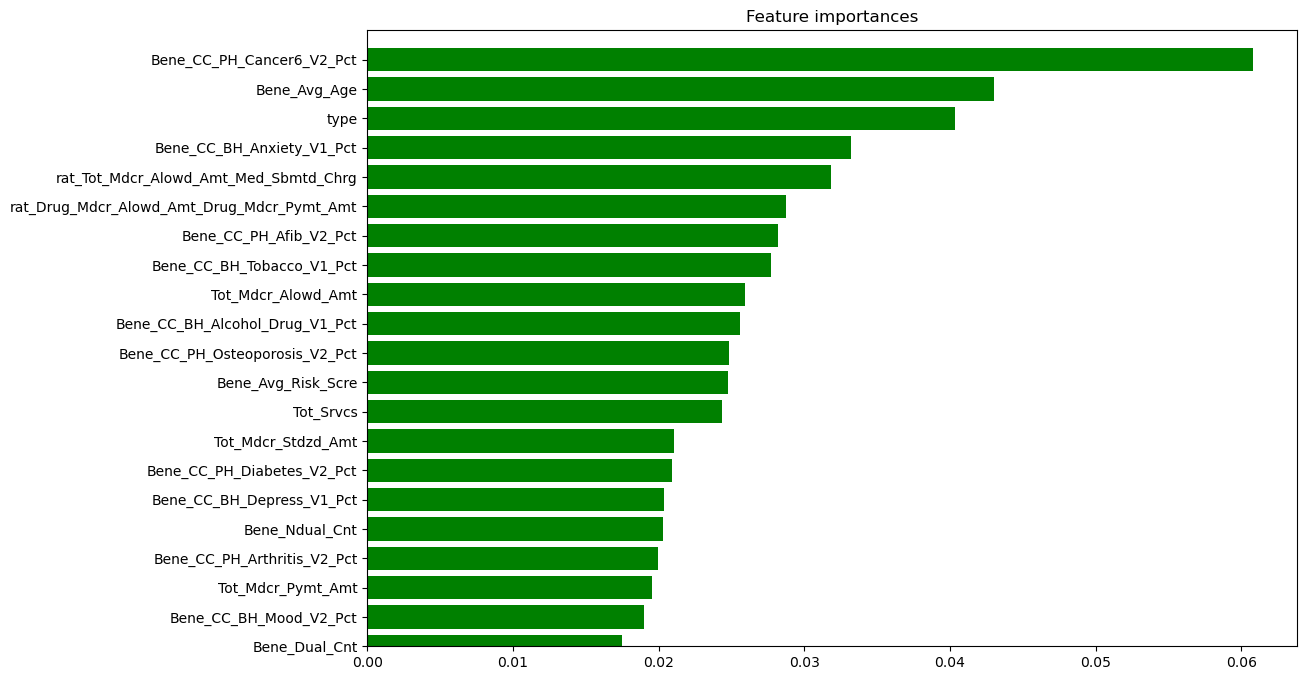

In [291]:
plt.figure(figsize=(12,8))
plt.title("Feature importances")
names = [feature_names[i] for i in indices]
plt.barh(range(X.shape[1]), importances[indices],
       color="g", align="center")
plt.yticks(range(X.shape[1]), names)
plt.ylim([20,-1])
plt.show()
#xerr=std[indices]

In [292]:
[feature_names[i] for i in indices[:10]]

['Bene_CC_PH_Cancer6_V2_Pct',
 'Bene_Avg_Age',
 'type',
 'Bene_CC_BH_Anxiety_V1_Pct',
 'rat_Tot_Mdcr_Alowd_Amt_Med_Sbmtd_Chrg',
 'rat_Drug_Mdcr_Alowd_Amt_Drug_Mdcr_Pymt_Amt',
 'Bene_CC_PH_Afib_V2_Pct',
 'Bene_CC_BH_Tobacco_V1_Pct',
 'Tot_Mdcr_Alowd_Amt',
 'Bene_CC_BH_Alcohol_Drug_V1_Pct']

In [293]:
X_train_10 = X_train[:,indices[:10]]
X_test_10 = X_test[:,indices[:10]]

In [294]:
clf_10 = RandomForestClassifier(n_estimators=200,max_depth=8,class_weight='balanced').fit(X_train_10, Y_train)

In [295]:
Y_pred_10 = clf_10.predict(X_test_10)
print(classification_report(Y_test,Y_pred_10))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      7073
           1       0.20      0.63      0.30       393

    accuracy                           0.85      7466
   macro avg       0.59      0.75      0.61      7466
weighted avg       0.94      0.85      0.88      7466



## Confusion Matrix
----------

In [296]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [298]:
Y_pred_proba = clf.predict_proba(X_test)
Y_pred_proba = Y_pred_proba[:,1]

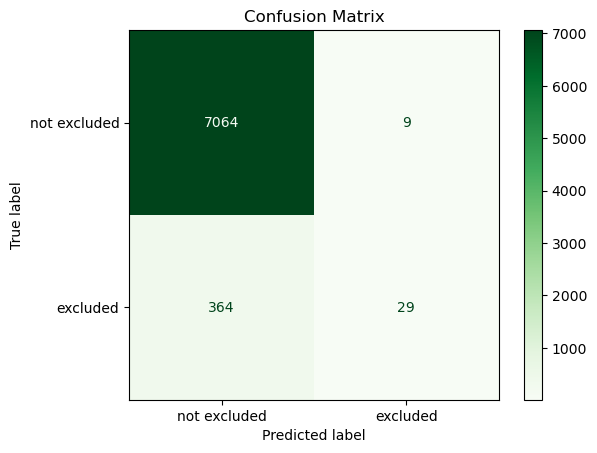

In [299]:
 cm = confusion_matrix(Y_test, Y_pred_proba > 0.8)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not excluded','excluded'])
disp.plot(cmap=plt.cm.Greens) # Customize colormap if desired
plt.title('Confusion Matrix')
plt.style.use("seaborn-v0_8-dark-palette")
plt.show()

In [300]:
Y_pred_proba_10 = clf_10.predict_proba(X_test_10)
Y_pred_proba_10 = Y_pred_proba_10[:,1]

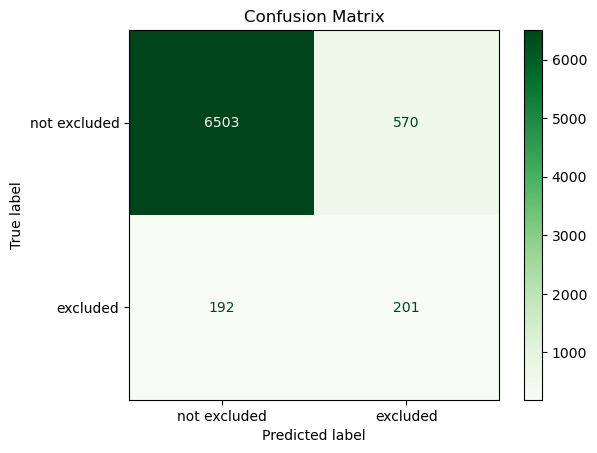

In [301]:
 cm = confusion_matrix(Y_test, Y_pred_proba_10 > 0.55)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not excluded','excluded'])
disp.plot(cmap=plt.cm.Greens) # Customize colormap if desired
plt.title('Confusion Matrix')
plt.style.use("seaborn-v0_8-dark-palette")
plt.show()

## ROC Curve

ROC curve based on total exclusion counts regardless of the exclusion type:

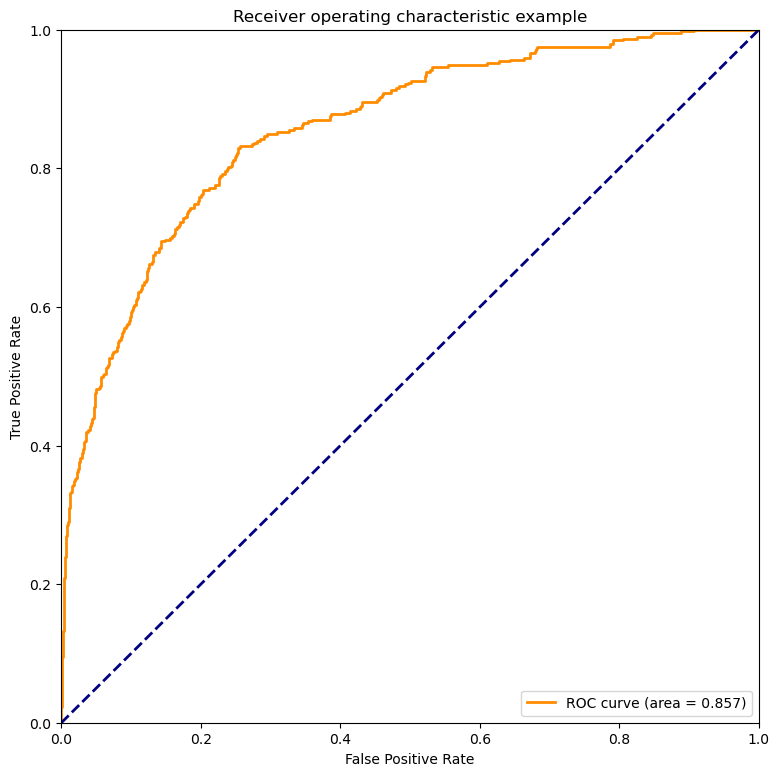

In [302]:
#partb_data.dtypes
Y_pred = clf.predict_proba(X_test)[:,1]

fpr,tpr, _ = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(9,9))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

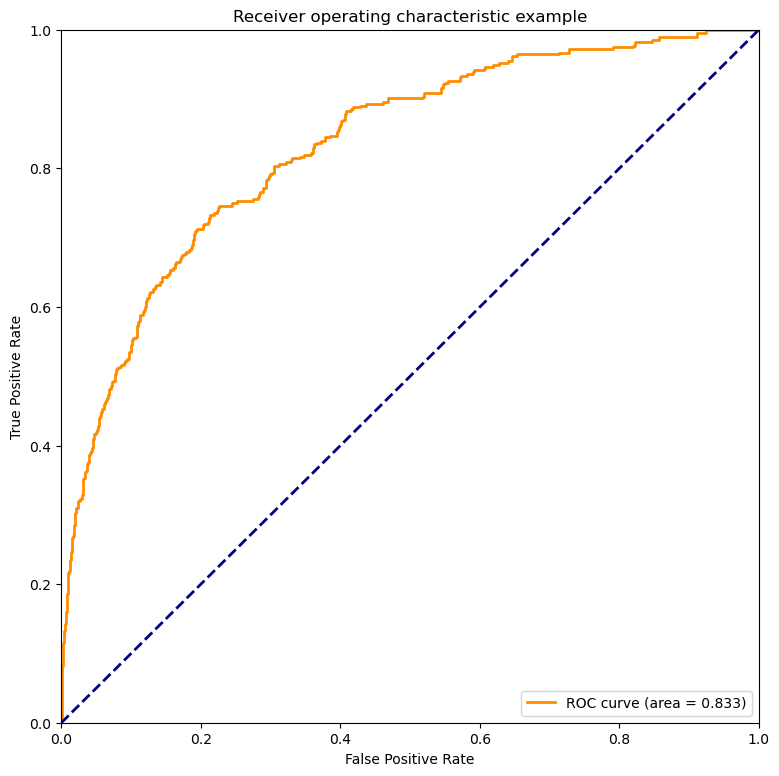

In [303]:
Y_pred = clf_10.predict_proba(X_test_10)[:,1]

fpr,tpr, _ = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(9,9))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Select 10 most important features

from xgboost import XGBClassifier as XGBC

In [304]:
from xgboost import XGBClassifier as XGBC

In [305]:
eval_set = [(X_train,Y_train),(X_test,Y_test)]

In [306]:
clf = XGBC(learning_rate=0.05,eval_metric='logloss',max_depth=8).fit(X_train, Y_train,eval_set=eval_set,verbose=True)

[0]	validation_0-logloss:0.19837	validation_1-logloss:0.20097
[1]	validation_0-logloss:0.19231	validation_1-logloss:0.19653
[2]	validation_0-logloss:0.18739	validation_1-logloss:0.19339
[3]	validation_0-logloss:0.18259	validation_1-logloss:0.19039
[4]	validation_0-logloss:0.17822	validation_1-logloss:0.18762
[5]	validation_0-logloss:0.17426	validation_1-logloss:0.18497
[6]	validation_0-logloss:0.17067	validation_1-logloss:0.18283
[7]	validation_0-logloss:0.16720	validation_1-logloss:0.18055
[8]	validation_0-logloss:0.16388	validation_1-logloss:0.17838
[9]	validation_0-logloss:0.16037	validation_1-logloss:0.17651
[10]	validation_0-logloss:0.15726	validation_1-logloss:0.17489
[11]	validation_0-logloss:0.15430	validation_1-logloss:0.17311
[12]	validation_0-logloss:0.15144	validation_1-logloss:0.17122
[13]	validation_0-logloss:0.14863	validation_1-logloss:0.16953
[14]	validation_0-logloss:0.14599	validation_1-logloss:0.16787
[15]	validation_0-logloss:0.14376	validation_1-logloss:0.16646
[1

In [307]:
excl_types = excltype_test.unique()[1:]
print(excl_types)

['1128b5' '1128b4' '1128a4' '1128a1' '1128a2' '1128a3' '1128b7' 'BRCH SA'
 '1128b6' '1128b3' '1128b1' '1128b2']


In [308]:
excltype_map = {
    '1128a1': 'Conviction – Medicare Fraud',
    '1128a2': 'Patient Abuse/Neglect',
    '1128a3': 'Felony – Drugs',
    '1128a4': 'Felony – Healthcare Fraud',
    '1128b1': 'Misdemeanor – Fraud',
    '1128b2': 'Default on Student Loan',
    '1128b3': 'License Revocation',
    '1128b4': 'Unlawful Claims',
    '1128b5': 'Kickbacks/Bribery',
    '1128b6': 'False Claims',
    '1128b7': 'Obstruction of Audit',
    '1128b8': 'Controlled Substances Violation',
    '1128b9': 'Insurance Fraud',
    '1128b10': 'Unlawful Billing',
    '1128b11': 'Quality of Care Violation',
    '1128b12': 'Civil Monetary Penalty',
    '1128b13': 'False Statement',
    '1128b14': 'Suspension/Exclusion',
    '1128b15': 'License Suspension',
    '1128b16': 'Federal Program Violation',
}

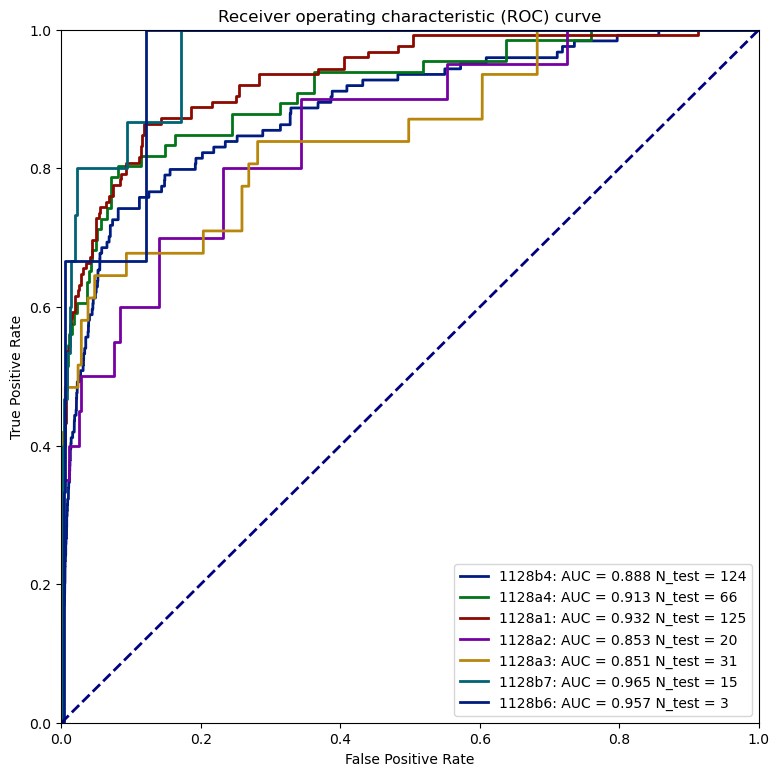

In [309]:
plt.figure(figsize=(9,9))
lw = 2

for excl_type in excl_types:
    

    excl_idx = np.isin(excltype_test.values,['UNK',excl_type])
    Y_pred = clf.predict_proba(X_test[excl_idx])[:,1]
    fpr,tpr, _ = roc_curve(Y_test[excl_idx],Y_pred)
    roc_auc = auc(fpr,tpr)
    n_test = Y_test[excl_idx].sum()
    if n_test < 3: continue
    plt.plot(fpr, tpr,
         lw=lw, label=f"{excl_type}: AUC = {roc_auc:0.3f} N_test = {n_test}")
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

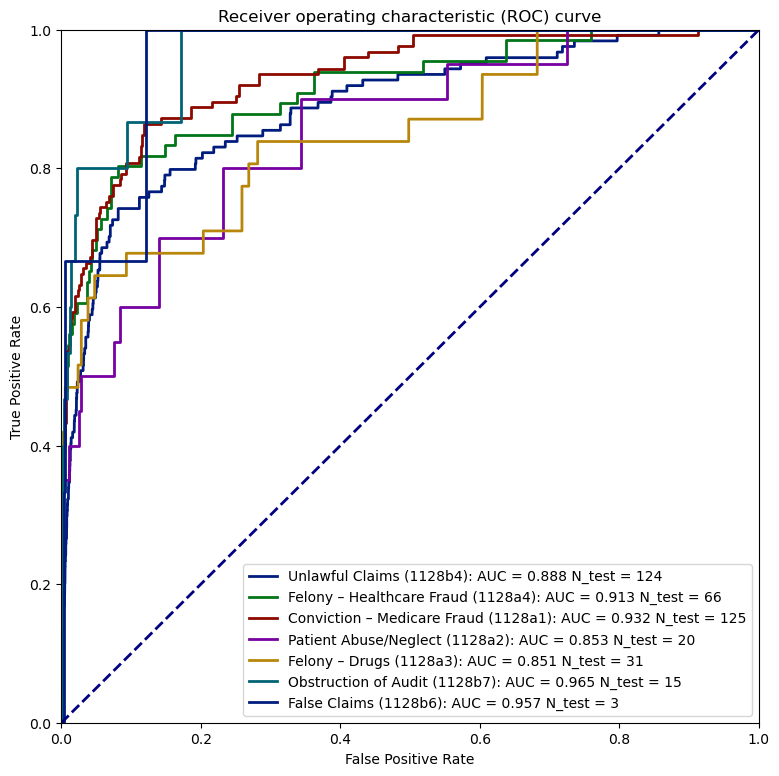

In [312]:
plt.figure(figsize=(9, 9))
lw = 2

for excl_type in excl_types:
    excl_idx = np.isin(excltype_test.values, ['UNK', excl_type])
    Y_pred = clf.predict_proba(X_test[excl_idx])[:, 1]
    fpr, tpr, _ = roc_curve(Y_test[excl_idx], Y_pred)
    roc_auc = auc(fpr, tpr)
    n_test = Y_test[excl_idx].sum()
    if n_test < 3:
        continue

    # Map code -> description (fallback to code if not found)
    desc = excltype_map.get(excl_type, excl_type)

    plt.plot(
        fpr,
        tpr,
        lw=lw,
        label=f"{desc} ({excl_type}): AUC = {roc_auc:0.3f} N_test = {n_test}"
    )

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [311]:
d1 = Counter(excltype_train)
d2 = Counter(excltype_test)
label_map = {t:i for i,t in enumerate(d1 | d2)}
label_map['UNK'] = -1
label_map


{'1128a1': 0,
 'UNK': -1,
 '1128b4': 2,
 '1128a3': 3,
 '1128a2': 4,
 '1128a4': 5,
 '1128b7': 6,
 '1128b3': 7,
 '1128b1': 8,
 'BRCH SA': 9,
 '1128b6': 10,
 '1128b2': 11,
 '1128b5': 12}

In [133]:
from collections import Counter
Counter(excltype_train)

Counter({'UNK': 29273,
         '1128b4': 362,
         '1128a1': 348,
         '1128a4': 142,
         '1128a3': 64,
         '1128b7': 41,
         '1128a2': 37,
         '1128b1': 11,
         '1128b3': 7,
         'BRCH SA': 5,
         '1128b6': 3,
         '1128b2': 1})

In [141]:
Y_train_ml = [label_map[y] for y in excltype_train]
Y_test_ml = [label_map[y] for y in excltype_test]

In [142]:
#dataset['EXCLTYPE'][:10]

In [143]:
clf_ml = RandomForestClassifier(n_estimators=150,max_depth=5,class_weight='balanced').fit(X_train, Y_train_ml)

In [144]:
Y_pred_ml = clf_ml.predict(X_test) 

In [145]:
print(classification_report(Y_test_ml,Y_pred_ml))

              precision    recall  f1-score   support

          -1       0.99      0.52      0.68      7331
           0       0.02      0.10      0.03        83
           2       0.05      0.28      0.09        87
           3       0.03      0.28      0.06        36
           4       0.00      0.33      0.01        15
           5       0.01      0.30      0.02        10
           6       0.00      0.17      0.01         6
           7       0.02      0.50      0.04         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1

    accuracy                           0.51      7574
   macro avg       0.09      0.21      0.08      7574
weighted avg       0.96      0.51      0.66      7574



/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (2).

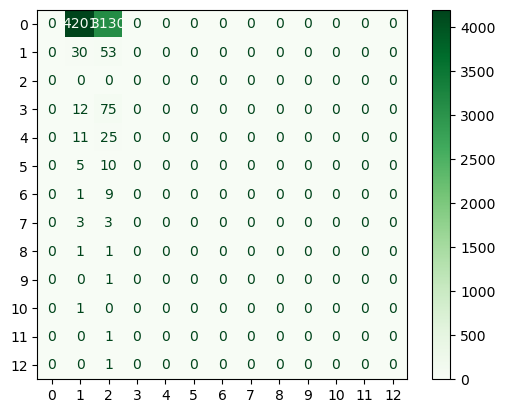

In [147]:
 cm = confusion_matrix(Y_test_ml, Y_pred_ml > 0.4)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not excluded','excluded'])
disp.plot(cmap=plt.cm.Greens) # Customize colormap if desired
plt.title('Confusion Matrix')
plt.style.use("seaborn-v0_8-dark-palette")
plt.show()